# Chapter 3
# Prediction on Iris Plants Dataset

In [35]:
# importing basic libaries

import numpy as np    # fundamental package for array computing
import pandas as pd   # Powerful data structures for data analysis, time series, and statistics
import matplotlib.pyplot as plt    # basic plotting library

## Loading and Description of Data

In [36]:
from sklearn import datasets
iris = datasets.load_iris()

In [37]:
# to look inside inside iris what it contains
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [38]:
# Description of the iris dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [39]:
# features of the iris plants dataset
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [40]:
# target of the iris plants dataset
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [41]:
# Let's load the dataset
iris_data = iris.data
iris_target = iris.target

In [42]:
# Let's see first five rows of features data
# 1st column : sepal length (cm)
# 2nd column : sepal width (cm)
# 3rd column : petal length (cm)
# 4th column : petal width (cm)

print(iris_data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [43]:
# Let's see the target data
# 0 represents Iris-Setosa
# 1 represents Iris-Versicolour
# 2 represents Iris-Virginica

print(iris_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Preprocessing of Data

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

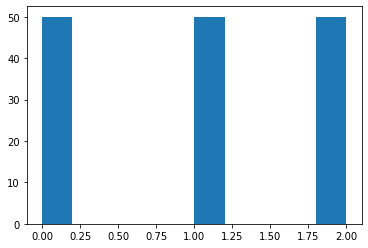

In [44]:
# Let's plot a histogram of iris_target to check class imbalance

plt.hist(iris_target)

We can see, there are equal number of examples (50) in each class in iris target.

In [45]:
# splitting the iris_data + iris_target into train and validation set
# train and validation data size depends on test_size parameters
# as test_size = 0.33, so train data size = 67% of whole data and validation data size = 33% of whole data

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(iris_data, iris_target, test_size=0.33, random_state=1)

## Building the Model

#### RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

## Prediction of the Model

In [47]:
y_pred = model.predict(X_valid)
print(y_pred)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1]


## Evaluation of the Model

In [48]:
# Let's see the confusion matix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_valid, y_pred))

[[17  0  0]
 [ 0 18  1]
 [ 0  1 13]]


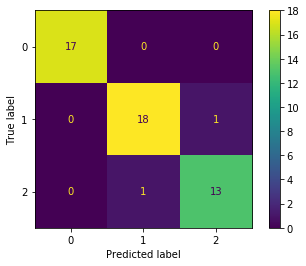

In [49]:
# plotting the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_valid, y_valid)
plt.show()

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        14

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [51]:
# let's see the accuracy score, precision score, recall score, f1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, average='weighted')
recall = accuracy_score(y_valid, y_pred)
f1 = accuracy_score(y_valid, y_pred)

print(f"Accuracy score : {accuracy}\nPrecision core : {precision}\nRecall score : {recall}\nF1 score : {f1}")

Accuracy score : 0.96
Precision core : 0.96
Recall score : 0.96
F1 score : 0.96


In [52]:
# Bias and variance
from mlxtend.evaluate import bias_variance_decomp

loss, bias, variance = bias_variance_decomp(model, X_train, y_train, X_valid, y_valid, loss = 'mse')

print(f"Loss : {loss}\nBias : {bias}\nVariance : {variance}")

Loss : 0.03929999999999999
Bias : 0.0380545
Variance : 0.0012455


Text(0.5, 1.0, 'Random Forest Classifier Decision Region Boundary')

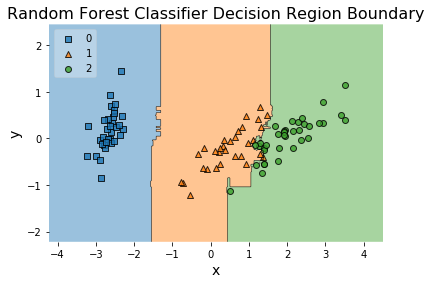

In [53]:
# Let's plot the decision boundary
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
model.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=model, legend=2)

plt.xlabel("x", size=14)
plt.ylabel("y", size=14)
plt.title('Random Forest Classifier Decision Region Boundary', size=16)

#### KNeighborsClassifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print(y_pred)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1]
[[17  0  0]
 [ 0 19  0]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      1.00      0.97        19
           2       1.00      0.93      0.96        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



#### SVM

In [55]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print(y_pred)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1]
[[17  0  0]
 [ 0 18  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.95      0.97        19
           2       0.93      1.00      0.97        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



#### Naive Bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print(y_pred)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[0 1 2 0 2 2 2 0 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 0 2
 0 2 2 2 0 2 2 2 2 0 0 0 2]
[[17  0  0]
 [ 0  1 18]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.05      0.10        19
           2       0.44      1.00      0.61        14

    accuracy                           0.64        50
   macro avg       0.81      0.68      0.57        50
weighted avg       0.84      0.64      0.55        50



#### AdaBoostClassifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print(y_pred)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1]
[[17  0  0]
 [ 0 18  1]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        14

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



# Chapter 4
# California Housing : A Regression Analysis

In [58]:
# importing basic libaries

import numpy as np    # fundamental package for array computing
import pandas as pd   # Powerful data structures for data analysis, time series, and statistics
import matplotlib.pyplot as plt    # basic plotting library

## Loading and Description of Data

In [59]:
from sklearn import datasets

housing = datasets.fetch_california_housing()

print(dir(housing))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [60]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [61]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [62]:
X = housing.data
print(X.shape)

(20640, 8)


In [63]:
y = housing.target
print(y.shape)

(20640,)


__Splitting data into training and validation set__

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

## Building Model

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200, criterion='mse', random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

## Prediction of the Model

In [66]:
pred = rf_reg.predict(X_valid)
print(pred.shape)

(4128,)


## Evaluation of the Model

In [67]:
import sklearn.metrics as sm

In [68]:
print("Mean absolute error =", sm.mean_absolute_error(y_valid, pred)) 
print("Mean squared error =", sm.mean_squared_error(y_valid, pred)) 
print("Median absolute error =", sm.median_absolute_error(y_valid, pred)) 
print("Explain variance score =", sm.explained_variance_score(y_valid, pred)) 
print("R2 score =", sm.r2_score(y_valid, pred))

Mean absolute error = 0.32673419980620183
Mean squared error = 0.2542437086894111
Median absolute error = 0.19843250000000018
Explain variance score = 0.8060956440468554
R2 score = 0.8059814051100983


In [69]:
print(rf_reg.score(X_train, y_train))
print(rf_reg.score(X_valid, y_valid))

0.9741828464082349
0.8059814051100983


In [70]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion='mse', random_state=42)

dt_reg.fit(X_train, y_train)
pred = dt_reg.predict(X_valid)

In [71]:
print("Mean absolute error =", sm.mean_absolute_error(y_valid, pred)) 
print("Mean squared error =", sm.mean_squared_error(y_valid, pred)) 
print("Median absolute error =", sm.median_absolute_error(y_valid, pred)) 
print("Explain variance score =", sm.explained_variance_score(y_valid, pred)) 
print("R2 score =", sm.r2_score(y_valid, pred))

Mean absolute error = 0.45543598837209304
Mean squared error = 0.4979753095391472
Median absolute error = 0.2629999999999999
Explain variance score = 0.620441829051136
R2 score = 0.6199848155744232


In [72]:
print(dt_reg.score(X_train, y_train))
print(dt_reg.score(X_valid, y_valid))

1.0
0.6199848155744232


In [73]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
def modelEvaluation(*models, X_valid, y_valid):
    mae, mse, rmse, r2, evs = [], [], [], [], []
    
    for model in models:
        pred = model.predict(X_valid)
        mae.append(sm.mean_absolute_error(y_valid, pred))
        mse.append(sm.mean_squared_error(y_valid, pred)) 
        rmse.append(sm.mean_squared_error(y_valid, pred) ** 0.5)
        r2.append(sm.r2_score(y_valid, pred))
        evs.append(sm.explained_variance_score(y_valid, pred))
        
    models = [str(m).split('(')[0] for m in models]
    print(f"MAE : {dict(zip(models, mae))}\n\nMSE : {dict(zip(models, mse))}\n\nRMSE{dict(zip(models, rmse))}\
\n\nR2 Score : {dict(zip(models, r2))}\n\nExplain Variance Score : {dict(zip(models, evs))}")
    
# calling the modelEvaluation function
modelEvaluation(rf_reg, dt_reg, xgb_reg, X_valid = X_valid, y_valid = y_valid)

MAE : {'RandomForestRegressor': 0.32673419980620183, 'DecisionTreeRegressor': 0.45543598837209304, 'XGBRegressor': 0.31130194064707717}

MSE : {'RandomForestRegressor': 0.2542437086894111, 'DecisionTreeRegressor': 0.4979753095391472, 'XGBRegressor': 0.22458288659730852}

RMSE{'RandomForestRegressor': 0.5042258508738034, 'DecisionTreeRegressor': 0.7056736565432687, 'XGBRegressor': 0.47390176893245345}

R2 Score : {'RandomForestRegressor': 0.8059814051100983, 'DecisionTreeRegressor': 0.6199848155744232, 'XGBRegressor': 0.8286161875212501}

Explain Variance Score : {'RandomForestRegressor': 0.8060956440468554, 'DecisionTreeRegressor': 0.620441829051136, 'XGBRegressor': 0.8286867032609089}


# Chapter 5
# Titanic Survivor Prediction : A Machine Learning Approach

Dataset download link are given below: <br>
https://www.kaggle.com/c/titanic/data

In [75]:
# importing basic libaries

import numpy as np    # fundamental package for array computing
import pandas as pd   # Powerful data structures for data analysis, time series, and statistics
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns    # statistical data visualization
sns.set(style="ticks", color_codes=True)

## Loading and Description of Data

In [76]:
# Loading the dataset

train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')

In [77]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [78]:
print(test_data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


__Description of the features:__

PassengerId : Id for each passenger <br>
Survived: 0 = No or dead, 1 = Yes or alive <br>
Pclass: 1 = Upper class,  2 = Middle class, 3 = Lower class <br>
Name : Name of the passenger <br>
Sex : male or female <br>
Age : Age in years <br>
SibSp : Number of siblings / spouses aboard the Titanic <br>
Parch : Number of parents / children aboard the Titanic <br>
Ticket : Ticket number <br>
Fare : Passenger fare <br>
Cabin : Cabin number <br>
Embarked : Port of Embarkation. here, C = Cherbourg, Q = Queenstown, S = Southampton <br>

__Notes:__
sibsp: The dataset defines family relations in this way... <br>
Sibling = brother, sister, stepbrother, stepsister <br>
Spouse = husband, wife (mistresses and fiancés were ignored) <br>

parch: The dataset defines family relations in this way... <br>
Parent = mother, father <br>
Child = daughter, son, stepdaughter, stepson <br>

Some children travelled only with a nanny, therefore parch=0 for them. <br>

In [79]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Visualization of Data

In [83]:
def featureRelation(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    print(f"{feature}    Survived   Dead")
    a, b = dict(survived), dict(dead)
    for x, y, z in zip(list(a.keys()), list(a.values()), list(b.values())):
        print(f"  {x}      {y}       {z}")

In [84]:
featureRelation('Age')

Age    Survived   Dead
  24.0      15       19
  36.0      11       18
  35.0      11       17
  27.0      11       17
  22.0      11       16
  30.0      10       16
  19.0      9       15
  32.0      9       15
  18.0      9       12
  29.0      8       12
  31.0      8       12
  28.0      7       11
  4.0      7       11
  34.0      6       10
  42.0      6       9
  26.0      6       9
  40.0      6       9
  16.0      6       9
  25.0      6       9
  48.0      6       8
  33.0      6       7
  17.0      6       7
  23.0      5       7
  1.0      5       7
  50.0      5       7
  45.0      5       7
  21.0      5       7
  3.0      5       6
  38.0      5       6
  39.0      5       6
  49.0      4       5
  5.0      4       5
  15.0      4       5
  14.0      3       5
  20.0      3       4
  54.0      3       4
  58.0      3       3
  52.0      3       3
  2.0      3       3
  44.0      3       3
  60.0      2       3
  13.0      2       3
  56.0      2       3
  9.0      2    

In [85]:
featureRelation('Sex')

Sex    Survived   Dead
  female      233       468
  male      109       81


In [86]:
featureRelation('Embarked')

Embarked    Survived   Dead
  S      217       427
  C      93       75
  Q      30       47


In [87]:
featureRelation('Pclass')

Pclass    Survived   Dead
  1      136       372
  3      119       97
  2      87       80


In [88]:
featureRelation('SibSp')

SibSp    Survived   Dead
  0      210       398
  1      112       97
  2      13       15
  3      4       15
  4      3       12


In [89]:
def featureDiagram(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10, 8))

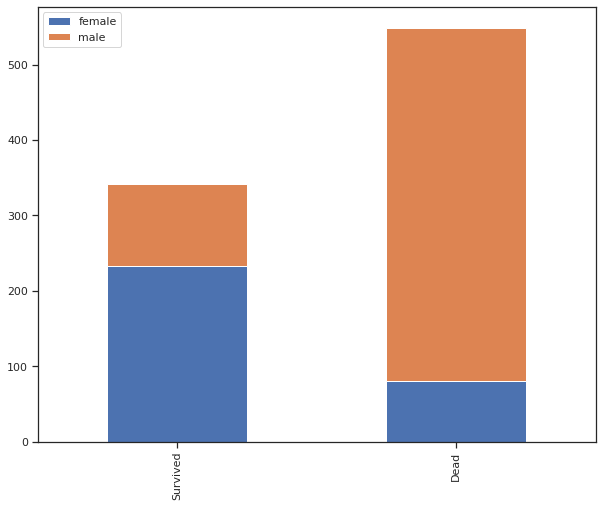

In [90]:
featureDiagram('Sex')

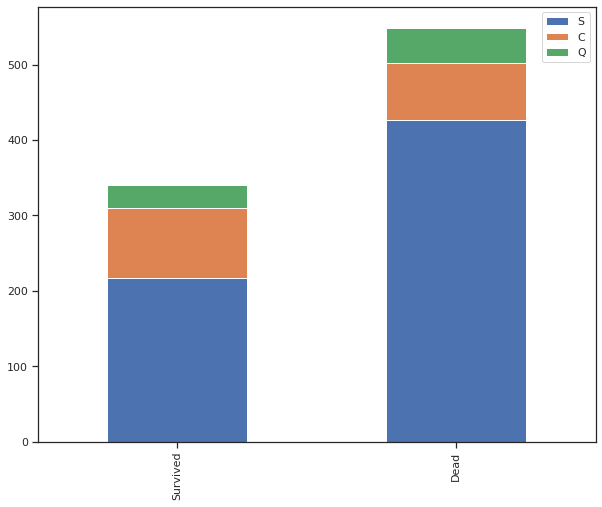

In [91]:
featureDiagram('Embarked')

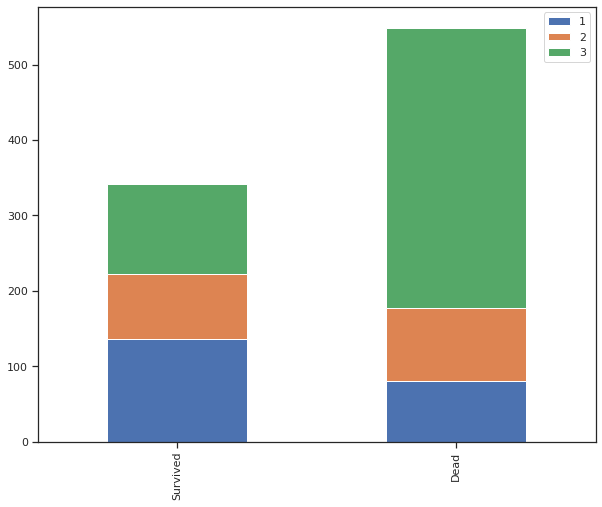

In [92]:
featureDiagram('Pclass')

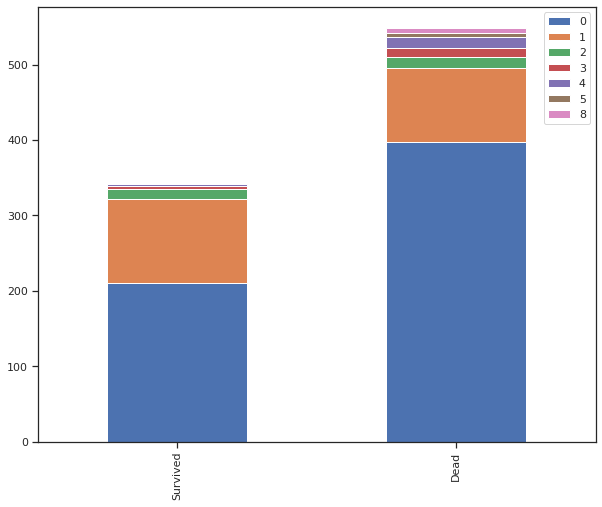

In [93]:
featureDiagram('SibSp')

## Preprocessing of data

### Checking Data Leakage

In [94]:
def checkingLeakage(df1, df2, col):
    
    df1_unique = set(df1[col].values)
    df2_unique = set(df2[col].values)
    
    common = df1_unique.intersection(df2_unique)

    # leakage contains true if there is data overlap, otherwise false.
    leakage = len(common) > 0
    
    if leakage == True:
        print("There are leakage of data between two datasets:\n", common)
    else:
        print("No data leakage.")

In [95]:
checkingLeakage(train_data, test_data, 'PassengerId')

No data leakage.


### Handling Categorical Variables

In [96]:
# separate the categorical columns in train data

trainObjColumn = train_data.select_dtypes(include = ['object'])
trainObjColumn.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [97]:
# separate the categorical columns in test data

testObjColumn = test_data.select_dtypes(include = ['object'])
testObjColumn.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,NaN,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q
3,"Wirz, Mr. Albert",male,315154,NaN,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S


__Handle each column one by one.__

In [98]:
# apply feature engineering on Name feature
# Extract the title only from the names and replace the name feature with title feature

import re

train_data.Name = pd.DataFrame([re.findall(' ([A-Za-z]+)\.', name) for name in train_data.Name])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
featureRelation('Name')

Name    Survived   Dead
  Miss      127       436
  Mrs      99       55
  Mr      81       26
  Master      23       17
  Dr      3       6
  Mlle      2       4
  Col      1       1
  Sir      1       1
  Lady      1       1
  Mme      1       1
  Ms      1       1


In [100]:
test_data.Name = pd.DataFrame([re.findall(' ([A-Za-z]+)\.', name) for name in test_data.Name])
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S


In [101]:
# Ticket feature

train_data.Ticket = pd.DataFrame([ticket.replace(' ', '/') for ticket in train_data.Ticket])
train_data.Ticket = pd.DataFrame([re.findall("([A-Z]*)[\/]", ticket) for ticket in train_data.Ticket])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,None,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,None,8.0500,NaN,S


In [102]:
test_data.Ticket = pd.DataFrame([ticket.replace(' ', '/') for ticket in test_data.Ticket])
test_data.Ticket = pd.DataFrame([re.findall("([A-Z]*)[\/]", ticket) for ticket in test_data.Ticket])
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,None,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,None,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,None,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,None,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,None,12.2875,NaN,S


In [103]:
featureRelation('Ticket')

Ticket    Survived   Dead
  PC      39       51
        21       22
  STON      8       21
  SC      7       15
  SOTON      2       10
  A      2       6
  C      2       6
  PP      2       3
  SO      1       1
  WE      1       1
  SW      1       1
  P      1       1


In [104]:
# Cabin feature

train_data.Cabin = pd.DataFrame([str(cabin)[0] for cabin in train_data.Cabin])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A,7.2500,n,S
1,2,1,1,Mrs,female,38.0,1,0,PC,71.2833,C,C
2,3,1,3,Miss,female,26.0,0,0,STON,7.9250,n,S
3,4,1,1,Mrs,female,35.0,1,0,None,53.1000,C,S
4,5,0,3,Mr,male,35.0,0,0,None,8.0500,n,S


In [105]:
test_data.Cabin = pd.DataFrame([str(cabin)[0] for cabin in test_data.Cabin])
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,None,7.8292,n,Q
1,893,3,Mrs,female,47.0,1,0,None,7.0000,n,S
2,894,2,Mr,male,62.0,0,0,None,9.6875,n,Q
3,895,3,Mr,male,27.0,0,0,None,8.6625,n,S
4,896,3,Mrs,female,22.0,1,1,None,12.2875,n,S


### Missing values

In [106]:
# Find out the columns containing missing values

cols_with_missing = [(column, train_data[column].isnull().sum()) for column in train_data.columns if train_data[column].isnull().any()]
print(f"Columns with missing value in train data are :\n{dict(cols_with_missing)}")

Columns with missing value in train data are :
{'Age': 177, 'Ticket': 665, 'Embarked': 2}


In [107]:
cols_with_missing = [(column, test_data[column].isnull().sum()) for column in test_data.columns if test_data[column].isnull().any()]
print(f"Columns with missing value in train data are :\n{dict(cols_with_missing)}")

Columns with missing value in train data are :
{'Age': 86, 'Ticket': 296, 'Fare': 1}


In [108]:
# filling all missing values in train data

#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer()

#train = pd.DataFrame(imputer.fit_transform(train_data))
#train.columns = train_data.columns

#test = pd.DataFrame(imputer.fit_transform(test_data))
#test.columns = test_data.columns'''

#train_data["Age"].fillna(train_data.groupby("Name")["Age"].transform("median"), inplace=True)
#test_data["Age"].fillna(test_data.groupby("Name")["Age"].transform("median"), inplace=True)

#test_data = test_data.interpolate()

In [109]:
#help('pandas.DataFrame.interpolate')

In [110]:
train_data = train_data.interpolate(method = 'quadratic')
test_data = test_data.interpolate(method = 'quadratic')

In [111]:
train_data = train_data.fillna("N")
test_data = test_data.fillna("N")

In [112]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [113]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [114]:
train = train_data.drop('Survived', axis = 1)
y = train_data['Survived']

In [115]:
# concatenate the train and test dataframe
df = pd.concat([train, test_data])
print(train.shape)
print(test_data.shape)
print(df.shape)

(891, 11)
(418, 11)
(1309, 11)


In [116]:
# import category_encoder for transforming categorical data into numeric
import category_encoders as ce

#encoder = ce.sum_coding.SumEncoder(verbose=False)
encoder = ce.BinaryEncoder(return_df=True)
encoded = encoder.fit_transform(df)
print(encoded.shape)
encoded.head()

(1309, 37)


/home/ikraminf/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,PassengerId,Pclass,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Sex_0,Sex_1,...,Ticket_5,Fare,Cabin_0,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Embarked_0,Embarked_1,Embarked_2
0,1,3,0,0,0,0,0,1,0,1,...,1,7.2500,0,0,0,0,1,0,0,1
1,2,1,0,0,0,0,1,0,1,0,...,0,71.2833,0,0,0,1,0,0,1,0
2,3,3,0,0,0,0,1,1,1,0,...,1,7.9250,0,0,0,0,1,0,0,1
3,4,1,0,0,0,0,1,0,1,0,...,0,53.1000,0,0,0,1,0,0,0,1
4,5,3,0,0,0,0,0,1,0,1,...,0,8.0500,0,0,0,0,1,0,0,1


In [117]:
# separating features and target variables

X = encoded.iloc[0:len(train_data), :]
test_data = encoded.iloc[len(train_data):, :]

In [118]:
print(X.shape)
print(y.shape)
print(test_data.shape)

(891, 37)
(891,)
(418, 37)


### Class Imbalance

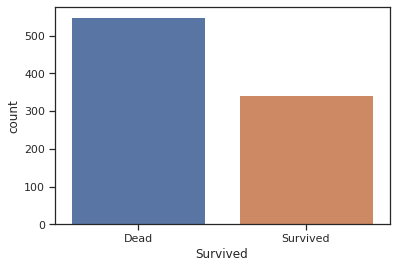

In [119]:
# visualizing the class imbalance

checkingImbalance = sns.countplot(y)
checkingImbalance.set_xticklabels(['Dead','Survived'])
plt.show()

In [120]:
# calculating weights to fix class imbalance
# we will pass this weights as a parameters of fit method

freq_pos = np.sum(y, axis = 0)/len(y)
freq_neg = 1 - freq_pos

pos_weights = freq_neg
neg_weights = freq_pos
#pos_contribution = freq_pos * pos_weights 
#neg_contribution = freq_neg * neg_weights

weight = {'0' : freq_neg * neg_weights, '1' : freq_pos * pos_weights}
weights = [weight[str(p)] for p in y.astype('int')]
#print(weights)

## Best Feature Selection

### Univariate Selection

In [121]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [122]:
#apply SelectKBest class to extract best features

bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Features','Score']

print(featureScores)

       Features        Score
0   PassengerId     3.312934
1        Pclass    30.873699
2        Name_0          NaN
3        Name_1     0.114107
4        Name_2     5.485764
5        Name_3     3.423210
6        Name_4   148.129073
7        Name_5    20.417370
8         Sex_0   170.348127
9         Sex_1    92.702447
10        Age_0          NaN
11        Age_1     1.428991
12        Age_2     1.936436
13        Age_3     5.272820
14        Age_4     0.010318
15        Age_5     0.244913
16        Age_6     0.414150
17        Age_7     0.838810
18        Age_8     0.368581
19        Age_9     0.194751
20        SibSp     2.581865
21        Parch    10.097499
22     Ticket_0          NaN
23     Ticket_1     0.114107
24     Ticket_2     4.552619
25     Ticket_3     0.087010
26     Ticket_4     1.381822
27     Ticket_5     0.186084
28         Fare  4518.319091
29      Cabin_0          NaN
30      Cabin_1     2.083077
31      Cabin_2    41.043572
32      Cabin_3    49.383977
33      Cabin_

In [123]:
worst_score_cols = featureScores.Features[featureScores.Score < 2]
print(worst_score_cols)

3       Name_1
11       Age_1
12       Age_2
14       Age_4
15       Age_5
16       Age_6
17       Age_7
18       Age_8
19       Age_9
23    Ticket_1
25    Ticket_3
26    Ticket_4
27    Ticket_5
33     Cabin_4
Name: Features, dtype: object


In [124]:
# drop the worst scored features features

#X = X.drop(worst_score_cols, axis = 1)
#X.head()

#test_data = test_data.drop(worst_score_cols, axis = 1)
#test_data.head()

In [125]:
# splitting train data into training set and validation set

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [126]:
X_train.shape

(712, 37)

In [127]:
y_train.shape

(712,)

### Cross Validation and Building Model

In [128]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)

In [129]:
from xgboost import XGBClassifier

model = XGBClassifier(base_score=None, booster=None, colsample_bylevel=None, colsample_bynode=None,
                      colsample_bytree=None, gamma=None, gpu_id=None, importance_type='entropy',
                      interaction_constraints=None, learning_rate=None, max_delta_step=None,
                      max_depth=None, min_child_weight=None, missing=None, monotone_constraints=None,
                      n_estimators=100, n_jobs=None, num_parallel_tree=None, random_state=None,
                      reg_alpha=None, reg_lambda=None, scale_pos_weight=None, subsample=None,
                      tree_method=None, validate_parameters=None, verbosity=None)

score = cross_val_score(model, X, y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)
print(np.mean(score))

[0.76666667 0.7752809  0.75280899 0.83146067 0.78651685 0.78651685
 0.84269663 0.78651685 0.83146067 0.76404494]
0.7923970037453183


In [130]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                               bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
                               warm_start=False, class_weight='balanced', ccp_alpha=0.0, max_samples=None)

score = cross_val_score(model, X, y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)
print(np.mean(score))

[0.76666667 0.7752809  0.76404494 0.79775281 0.83146067 0.82022472
 0.8988764  0.84269663 0.88764045 0.78651685]
0.817116104868914


In [131]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None, n_jobs=None)

score = cross_val_score(model, X, y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)
print(np.mean(score))

[0.63333333 0.64044944 0.62921348 0.69662921 0.53932584 0.64044944
 0.61797753 0.57303371 0.70786517 0.62921348]
0.630749063670412


In [132]:
from sklearn.svm import SVC
model = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False,
            tol=0.001, cache_size=200, class_weight='balanced', verbose=False, max_iter=-1,
            decision_function_shape='ovr', break_ties=False, random_state=1)

score = cross_val_score(model, X, y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)
print(np.mean(score))

[0.62222222 0.66292135 0.64044944 0.69662921 0.66292135 0.66292135
 0.69662921 0.69662921 0.70786517 0.73033708]
0.6779525593008738


In [133]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate = 0.01,
                           algorithm='SAMME.R', random_state=1)

score = cross_val_score(model, X, y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)
print(np.mean(score))

[0.73333333 0.82022472 0.70786517 0.74157303 0.80898876 0.78651685
 0.87640449 0.78651685 0.83146067 0.7752809 ]
0.7868164794007491


In [134]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                               random_state=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
                               min_impurity_split=None, class_weight='balanced', ccp_alpha=0.0)

score = cross_val_score(model, X, y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)
print(np.mean(score))

[0.73333333 0.70786517 0.7752809  0.74157303 0.79775281 0.78651685
 0.79775281 0.74157303 0.76404494 0.75280899]
0.7598501872659176


## Prediction of the Model

In [135]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                               bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
                               warm_start=False, class_weight='balanced', ccp_alpha=0.0, max_samples=None)

model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

## Evaluation of the Model

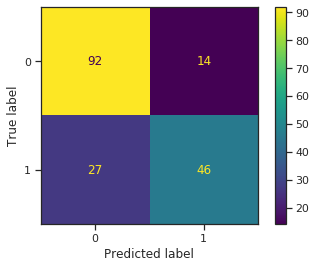

In [136]:
# plotting the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_valid, y_valid)
plt.show()

In [137]:
# let's see the accuracy score, precision score, recall score, f1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, average='weighted')
recall = accuracy_score(y_valid, y_pred)
f1 = accuracy_score(y_valid, y_pred)

print(f"Accuracy score : {accuracy}\nPrecision core : {precision}\nRecall score : {recall}\nF1 score : {f1}")

Accuracy score : 0.770949720670391
Precision core : 0.770481824014522
Recall score : 0.770949720670391
F1 score : 0.770949720670391


### Feature Importance

In [138]:
print(model.feature_importances_)

[1.18271794e-01 7.01788717e-02 0.00000000e+00 6.77496374e-05
 1.42294220e-03 1.73757588e-02 7.87710818e-02 4.64587938e-02
 9.72430312e-02 8.38486633e-02 0.00000000e+00 1.69563714e-03
 1.37432373e-02 1.93403055e-02 2.58086148e-02 2.04374239e-02
 2.37833908e-02 2.00268766e-02 2.28842534e-02 2.34365213e-02
 3.92651058e-02 2.68213680e-02 0.00000000e+00 4.53740095e-04
 5.85761189e-03 1.19809796e-02 1.49511756e-02 1.07415042e-02
 1.25842917e-01 0.00000000e+00 1.83389844e-03 1.63348002e-02
 1.94610578e-02 7.98454909e-03 2.20641281e-05 1.86638978e-02
 1.49903833e-02]


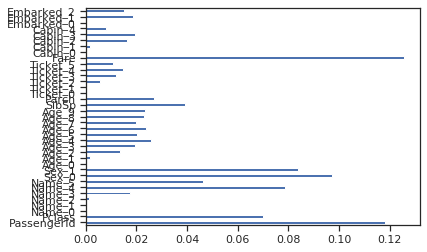

In [139]:
#plot graph of feature importances for better visualization

importances = pd.Series(model.feature_importances_, index = X.columns)
importances.plot(kind = 'barh')
plt.show()

In [140]:
print(importances)

PassengerId    0.118272
Pclass         0.070179
Name_0         0.000000
Name_1         0.000068
Name_2         0.001423
Name_3         0.017376
Name_4         0.078771
Name_5         0.046459
Sex_0          0.097243
Sex_1          0.083849
Age_0          0.000000
Age_1          0.001696
Age_2          0.013743
Age_3          0.019340
Age_4          0.025809
Age_5          0.020437
Age_6          0.023783
Age_7          0.020027
Age_8          0.022884
Age_9          0.023437
SibSp          0.039265
Parch          0.026821
Ticket_0       0.000000
Ticket_1       0.000454
Ticket_2       0.005858
Ticket_3       0.011981
Ticket_4       0.014951
Ticket_5       0.010742
Fare           0.125843
Cabin_0        0.000000
Cabin_1        0.001834
Cabin_2        0.016335
Cabin_3        0.019461
Cabin_4        0.007985
Embarked_0     0.000022
Embarked_1     0.018664
Embarked_2     0.014990
dtype: float64


In [141]:
z = importances[importances < 0.0001]
worst_score_cols = list(z.index)
print(worst_score_cols)

['Name_0', 'Name_1', 'Age_0', 'Ticket_0', 'Cabin_0', 'Embarked_0']


In [142]:
# drop the worst scored features features

#X = X.drop(worst_score_cols, axis = 1)
#X.head()

In [143]:
#test_data = test_data.drop(worst_score_cols, axis = 1)
#test_data.head()

## Prepare CSV File To Submit Into Kaggle
Competition Link : https://www.kaggle.com/c/titanic/overview

In [144]:
# prepare your file as sample_submission file provided by kaggle
sample_submission = pd.read_csv("titanic/sample_submission.csv")
print(sample_submission.shape)
sample_submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [145]:
# fits the model in whole dataset and predicts for test data

model.fit(X, y, sample_weight = weights)
preds = model.predict(test_data)

In [146]:
submission = pd.DataFrame({"PassengerId" : test_data.PassengerId.astype('int'), 'Survived': np.array(preds).astype('int')})
submission.to_csv('titanic/submission.csv', index=False)

# Chapter 6
# House Prices Prediction : Regression

Dataset download link are given below: <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [147]:
# importing basic libaries

import numpy as np    # fundamental package for array computing
import pandas as pd   # Powerful data structures for data analysis, time series, and statistics
import matplotlib.pyplot as plt    # basic plotting library

## Loading and Description of Data

In [148]:
train = pd.read_csv("house_price/train.csv")
test = pd.read_csv("house_price/test.csv")

In [149]:
print("Number of features in train : ", len(train.columns))
print("\nFeatures in train :\n", list(train.columns))
print(f"\nRow x Column in train : {train.shape[0]} x {train.shape[1]}")

Number of features in train :  81

Features in train :
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Enclosed

In [150]:
print("Number of features in test : ", len(test.columns))
print("\nFeatures in test :\n", list(test.columns))
print(f"\nRow x Column in test : {test.shape[0]} x {test.shape[1]}")

Number of features in test :  80

Features in test :
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPo

__Target column is SalePrice__

In [151]:
with open("house_price/data_description.txt", 'r') as f:
    description = f.read()

#print(description)

__File descriptions__<br>
train.csv - the training set <br>
test.csv - the test set <br>
data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here <br>
sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms <br>

__Data fields__<br>
Here's a brief version of what you'll find in the data description file. <br>

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict. <br>
MSSubClass: The building class <br>
MSZoning: The general zoning classification <br>
LotFrontage: Linear feet of street connected to property <br>
LotArea: Lot size in square feet <br>
Street: Type of road access <br>
Alley: Type of alley access <br>
LotShape: General shape of property <br>
LandContour: Flatness of the property <br>
Utilities: Type of utilities available <br>
LotConfig: Lot configuration <br>
LandSlope: Slope of property <br>
Neighborhood: Physical locations within Ames city limits <br>
Condition1: Proximity to main road or railroad <br>
Condition2: Proximity to main road or railroad (if a second is present) <br>
BldgType: Type of dwelling <br>
HouseStyle: Style of dwelling <br>
OverallQual: Overall material and finish quality <br>
OverallCond: Overall condition rating <br>
YearBuilt: Original construction date <br>
YearRemodAdd: Remodel date <br>
RoofStyle: Type of roof <br>
RoofMatl: Roof material <br>
Exterior1st: Exterior covering on house <br>
Exterior2nd: Exterior covering on house (if more than one material) <br>
MasVnrType: Masonry veneer type <br>
MasVnrArea: Masonry veneer area in square feet <br>
ExterQual: Exterior material quality <br>
ExterCond: Present condition of the material on the exterior <br>
Foundation: Type of foundation <br>
BsmtQual: Height of the basement <br>
BsmtCond: General condition of the basement <br>
BsmtExposure: Walkout or garden level basement walls <br>
BsmtFinType1: Quality of basement finished area <br>
BsmtFinSF1: Type 1 finished square feet <br>
BsmtFinType2: Quality of second finished area (if present) <br>
BsmtFinSF2: Type 2 finished square feet <br>
BsmtUnfSF: Unfinished square feet of basement area <br>
TotalBsmtSF: Total square feet of basement area <br>
Heating: Type of heating <br>
HeatingQC: Heating quality and condition <br>
CentralAir: Central air conditioning <br>
Electrical: Electrical system <br>
1stFlrSF: First Floor square feet <br>
2ndFlrSF: Second floor square feet <br>
LowQualFinSF: Low quality finished square feet (all floors) <br>
GrLivArea: Above grade (ground) living area square feet <br>
BsmtFullBath: Basement full bathrooms <br>
BsmtHalfBath: Basement half bathrooms <br>
FullBath: Full bathrooms above grade <br>
HalfBath: Half baths above grade <br>
Bedroom: Number of bedrooms above basement level <br>
Kitchen: Number of kitchens <br>
KitchenQual: Kitchen quality <br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) <br>
Functional: Home functionality rating <br>
Fireplaces: Number of fireplaces <br>
FireplaceQu: Fireplace quality <br>
GarageType: Garage location <br>
GarageYrBlt: Year garage was built <br>
GarageFinish: Interior finish of the garage <br>
GarageCars: Size of garage in car capacity <br>
GarageArea: Size of garage in square feet <br>
GarageQual: Garage quality <br>
GarageCond: Garage condition <br>
PavedDrive: Paved driveway <br>
WoodDeckSF: Wood deck area in square feet <br>
OpenPorchSF: Open porch area in square feet <br>
EnclosedPorch: Enclosed porch area in square feet <br>
3SsnPorch: Three season porch area in square feet <br>
ScreenPorch: Screen porch area in square feet <br>
PoolArea: Pool area in square feet <br>
PoolQC: Pool quality <br>
Fence: Fence quality <br>
MiscFeature: Miscellaneous feature not covered in other categories <br>
MiscVal: $Value of miscellaneous feature <br>
MoSold: Month Sold <br>
YrSold: Year Sold <br>
SaleType: Type of sale <br>
SaleCondition: Condition of sale <br>

In [152]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [153]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Preprocessing of Data

### Handling Missing Values

In [154]:
#train = train.interpolate()
#test = test.interpolate()

In [155]:
# Find out the columns containing missing values

cols_with_missing = [(column, train[column].isnull().sum()) for column in train.columns if train[column].isnull().any()]
print(f"Columns with missing value in train data are :\n{dict(cols_with_missing)}")

Columns with missing value in train data are :
{'LotFrontage': 259, 'Alley': 1369, 'MasVnrType': 8, 'MasVnrArea': 8, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinType2': 38, 'Electrical': 1, 'FireplaceQu': 690, 'GarageType': 81, 'GarageYrBlt': 81, 'GarageFinish': 81, 'GarageQual': 81, 'GarageCond': 81, 'PoolQC': 1453, 'Fence': 1179, 'MiscFeature': 1406}


In [156]:
# Find out the columns containing missing values

cols_with_missing = [(column, test[column].isnull().sum()) for column in test.columns if test[column].isnull().any()]
print(f"Columns with missing value in test data are :\n{dict(cols_with_missing)}")

Columns with missing value in test data are :
{'MSZoning': 4, 'LotFrontage': 227, 'Alley': 1352, 'Utilities': 2, 'Exterior1st': 1, 'Exterior2nd': 1, 'MasVnrType': 16, 'MasVnrArea': 15, 'BsmtQual': 44, 'BsmtCond': 45, 'BsmtExposure': 44, 'BsmtFinType1': 42, 'BsmtFinSF1': 1, 'BsmtFinType2': 42, 'BsmtFinSF2': 1, 'BsmtUnfSF': 1, 'TotalBsmtSF': 1, 'BsmtFullBath': 2, 'BsmtHalfBath': 2, 'KitchenQual': 1, 'Functional': 2, 'FireplaceQu': 730, 'GarageType': 76, 'GarageYrBlt': 78, 'GarageFinish': 78, 'GarageCars': 1, 'GarageArea': 1, 'GarageQual': 78, 'GarageCond': 78, 'PoolQC': 1456, 'Fence': 1169, 'MiscFeature': 1408, 'SaleType': 1}


In [157]:
# filling all missing values in train data

#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer()

#imputed_train = pd.DataFrame(imputer.fit_transform(train))
#imputed_train.columns = train.columns

#imputed_test = pd.DataFrame(imputer.fit_transform(test))
#imputed_test.columns = test.columns

In [158]:
imputed_train = train.fillna(method = 'bfill')
imputed_test = test.fillna(method = 'bfill')

In [159]:
imputed_train = imputed_train.fillna(0)
imputed_test = imputed_test.fillna(0)

In [160]:
# Find out the columns containing missing values after filling

cols_with_missing = [(column, imputed_train[column].isnull().sum()) for column in imputed_train.columns if imputed_train[column].isnull().any()]
print(f"Columns with missing value in train after filling :\n{dict(cols_with_missing)}")

Columns with missing value in train after filling :
{}


In [161]:
# Find out the columns containing missing values after filling

cols_with_missing = [(column, imputed_test[column].isnull().sum()) for column in imputed_test.columns if imputed_test[column].isnull().any()]
print(f"Columns with missing value in test after filling :\n{dict(cols_with_missing)}")

Columns with missing value in test after filling :
{}


### Handling Categorical Variables

In [162]:
train_obj = imputed_train.select_dtypes(include='object')
train_obj

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,0,MnPrv,Shed,WD,Normal
1456,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,0,MnPrv,Shed,WD,Normal
1457,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,0,GdPrv,Shed,WD,Normal
1458,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,0,0,0,WD,Normal


In [163]:
test_obj = imputed_test.select_dtypes(include='object')
test_obj

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Gar2,WD,Normal
1,RL,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Gar2,WD,Normal
2,RL,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
3,RL,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,Ex,GdPrv,Shed,WD,Normal
4,RL,Pave,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,Ex,GdPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,0,MnPrv,Shed,WD,Normal
1455,RM,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,0,MnPrv,Shed,WD,Abnorml
1456,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,0,MnPrv,Shed,WD,Abnorml
1457,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Fin,TA,TA,Y,0,MnPrv,Shed,WD,Normal


In [164]:
# separate feature and target from train
imputed_trainf = imputed_train.drop(columns = ['SalePrice'], axis = 1)
y = imputed_train['SalePrice']

In [165]:
# concatenate the train and test dataframe
df = pd.concat([imputed_trainf, imputed_test])
print(imputed_trainf.shape)
print(imputed_test.shape)
print(df.shape)

(1460, 80)
(1459, 80)
(2919, 80)


In [166]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal


In [167]:
# import category_encoder for transforming categorical data into numeric
import category_encoders as ce

In [168]:
#encoder = ce.BinaryEncoder(return_df=True)

encoder = ce.sum_coding.SumEncoder(verbose=False)
encoded = encoder.fit_transform(df)
print(encoded.shape)
encoded.head()

/home/ikraminf/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(2919, 252)


,intercept,Id,MSSubClass,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotFrontage,LotArea,Street_0,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,1,1,60,1.0,0.0,0.0,0.0,65.0,8450,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,20,1.0,0.0,0.0,0.0,80.0,9600,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,3,60,1.0,0.0,0.0,0.0,68.0,11250,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,4,70,1.0,0.0,0.0,0.0,60.0,9550,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,5,60,1.0,0.0,0.0,0.0,84.0,14260,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [169]:
#from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data 
#train_data = imputed_train.copy()
#test_data = imputed_test.copy()

# Apply ordinal encoder to each column with categorical data
#ordinal_encoder = OrdinalEncoder()

#train_data[train_obj.columns] = ordinal_encoder.fit_transform(imputed_train[train_obj.columns])
#test_data[test_obj.columns] = ordinal_encoder.transform(imputed_test[test_obj.columns])

In [170]:
# separating features and target variables

X = encoded.iloc[0:len(imputed_trainf), :]
test_data = encoded.iloc[len(imputed_trainf):, :]

In [171]:
X.shape

(1460, 252)

In [172]:
y.shape

(1460,)

In [173]:
test_data.shape

(1459, 252)

In [174]:
# splitting the train data into training set and validation set

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state = 42)

### Cross Validation, Building model

In [175]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state = 1)

In [176]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=1)
score = cross_val_score(rf_reg, X, y, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100, 2))

[0.93818614 0.86945756 0.91625867 0.76251551 0.83811367 0.8704803
 0.73138771 0.84819868 0.89497775 0.90961554]
85.79


In [177]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion='mse', random_state=1)
score = cross_val_score(dt_reg, X, y, cv=k_fold, n_jobs=1)
print(score)
print(np.mean(score))

[0.850191   0.73087603 0.78953505 0.71795922 0.58372302 0.75804085
 0.67140594 0.81775424 0.73152411 0.80618563]
0.7457195079056829


In [178]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
score = cross_val_score(xgb_reg, X, y, cv=k_fold, n_jobs=1)
print(score)
print(np.mean(score))

[0.92076728 0.75225548 0.89745526 0.86437838 0.83915988 0.88120336
 0.60310231 0.84671939 0.91343055 0.92364522]
0.8442117105590728


### Evaluating Random Forest Regressor Model

In [179]:
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_valid)

In [180]:
import sklearn.metrics as sm

print("Mean absolute error =", sm.mean_absolute_error(y_valid, pred)) 
print("Mean squared error =", sm.mean_squared_error(y_valid, pred)) 
print("Median absolute error =", sm.median_absolute_error(y_valid, pred)) 
print("Explain variance score =", sm.explained_variance_score(y_valid, pred)) 
print("R2 score =", sm.r2_score(y_valid, pred))

Mean absolute error = 18146.831130136987
Mean squared error = 868728283.0981168
Median absolute error = 10604.490000000005
Explain variance score = 0.8868038154794455
R2 score = 0.8867416769988068


### Evaluating Decision Tree Regressor Model

In [181]:
dt_reg.fit(X_train, y_train)
pred = dt_reg.predict(X_valid)

In [182]:
print("Mean absolute error =", sm.mean_absolute_error(y_valid, pred)) 
print("Mean squared error =", sm.mean_squared_error(y_valid, pred)) 
print("Median absolute error =", sm.median_absolute_error(y_valid, pred)) 
print("Explain variance score =", sm.explained_variance_score(y_valid, pred)) 
print("R2 score =", sm.r2_score(y_valid, pred))

Mean absolute error = 27505.62328767123
Mean squared error = 1810148593.5136986
Median absolute error = 18000.0
Explain variance score = 0.7640208521518964
R2 score = 0.764006308908012


### Evaluating XGBoost Regressor Model

In [183]:
xgb_reg.fit(X_train, y_train)
pred = xgb_reg.predict(X_valid)

In [184]:
print("Mean absolute error =", sm.mean_absolute_error(y_valid, pred)) 
print("Mean squared error =", sm.mean_squared_error(y_valid, pred)) 
print("Median absolute error =", sm.median_absolute_error(y_valid, pred)) 
print("Explain variance score =", sm.explained_variance_score(y_valid, pred)) 
print("R2 score =", sm.r2_score(y_valid, pred))

Mean absolute error = 17076.04342358733
Mean squared error = 696182539.4812964
Median absolute error = 11607.28125
Explain variance score = 0.9095129534585817
R2 score = 0.9092369058790524


In [185]:
# score of the models

print(rf_reg.score(X, y))
print(dt_reg.score(X, y))
print(xgb_reg.score(X, y))

0.9570539342098336
0.9425968202670156
0.977772888411436


In [186]:
def modelEvaluation(*models, X_valid, y_valid):
    mae, mse, rmse, r2, evs = [], [], [], [], []
    
    for model in models:
        pred = model.predict(X_valid)
        mae.append(sm.mean_absolute_error(y_valid, pred))
        mse.append(sm.mean_squared_error(y_valid, pred)) 
        rmse.append(sm.mean_squared_error(y_valid, pred) ** 0.5)
        r2.append(sm.r2_score(y_valid, pred))
        evs.append(sm.explained_variance_score(y_valid, pred))
        
    models = [str(m).split('(')[0] for m in models]
    print(f"MAE : {dict(zip(models, mae))}\n\nMSE : {dict(zip(models, mse))}\n\nRMSE{dict(zip(models, rmse))}\
\n\nR2 Score : {dict(zip(models, r2))}\n\nExplain Variance Score : {dict(zip(models, evs))}")
    
# calling the modelEvaluation function
modelEvaluation(rf_reg, dt_reg, xgb_reg, X_valid = X_valid, y_valid = y_valid)

MAE : {'RandomForestRegressor': 18146.831130136987, 'DecisionTreeRegressor': 27505.62328767123, 'XGBRegressor': 17076.04342358733}

MSE : {'RandomForestRegressor': 868728283.0981168, 'DecisionTreeRegressor': 1810148593.5136986, 'XGBRegressor': 696182539.4812964}

RMSE{'RandomForestRegressor': 29474.196903361368, 'DecisionTreeRegressor': 42545.84108363235, 'XGBRegressor': 26385.271260331898}

R2 Score : {'RandomForestRegressor': 0.8867416769988068, 'DecisionTreeRegressor': 0.764006308908012, 'XGBRegressor': 0.9092369058790524}

Explain Variance Score : {'RandomForestRegressor': 0.8868038154794455, 'DecisionTreeRegressor': 0.7640208521518964, 'XGBRegressor': 0.9095129534585817}


## Prepare CSV File To Submit Into Kaggle
Competition Link : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [187]:
# prepare your file as sample_submission file provided by kaggle
sample_submission = pd.read_csv("house_price/sample_submission.csv")
print(sample_submission.shape)
sample_submission.head()

(1459, 2)


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [188]:
xgb_reg.fit(X, y)
pred = xgb_reg.predict(test_data)

In [189]:
Id = test_data['Id'].astype('int')

submission = pd.DataFrame({"Id" : Id, 'SalePrice': pred})
submission.to_csv('house_price/submission.csv', index=False)

# Chapter 7
# Understanding Kmeans clustering

In [190]:
# importing basic libaries

import numpy as np    # fundamental package for array computing
import pandas as pd   # Powerful data structures for data analysis, time series, and statistics
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns    # statistical data visualization

## Making Artificial Dataset

In [191]:
# create a dataset having 200 samples, 2 features and 4 clusters

from sklearn.datasets import make_blobs

X, cluster_arr = make_blobs(n_samples = 200, n_features = 2, centers = 4, cluster_std = 1.5)
print(X.shape)
print(cluster_arr.shape)

(200, 2)
(200,)


## Visualization of Data

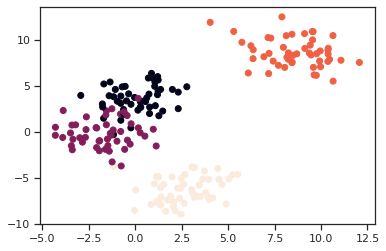

In [192]:
plt.scatter(X[:,0], X[:,1], c = cluster_arr)

In [193]:
df = pd.concat([pd.DataFrame(X, columns=['feature1', 'feature2']), pd.DataFrame(cluster_arr, columns=['center'])], axis=1)
df.head()

,feature1,feature2,center
0,7.896949,12.530251,2
1,-1.338834,-0.169389,1
2,4.177226,-7.196819,3
3,-3.400790,0.738122,1
4,0.709423,5.862912,0


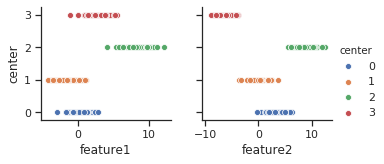

In [194]:
sns.pairplot(df, hue = 'center', x_vars = ['feature1', 'feature2'], y_vars = ['center'], kind='scatter')

## Building Model

In [195]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)

model.fit(X)

KMeans(n_clusters=4)

## Prediction of the Model

In [196]:
#See the predictions
labels = model.labels_

centroids = model.cluster_centers_

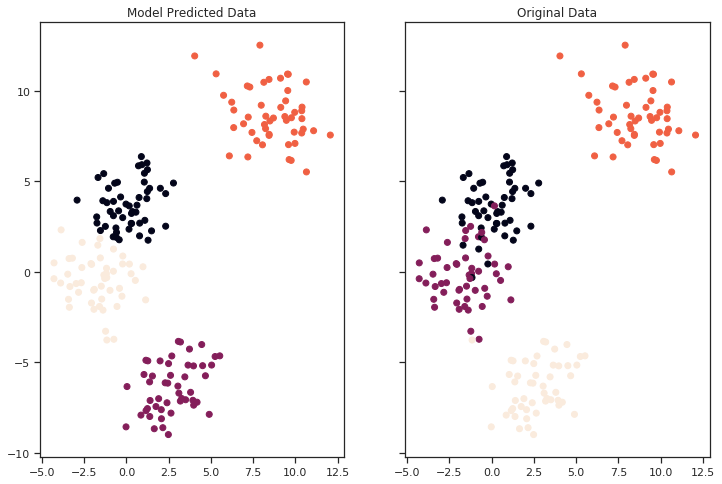

In [197]:
#PLot the predictions against the original data set

fig, (axes1, axes2) = plt.subplots(1, 2, sharey=True, figsize=(12, 8))

axes1.set_title('Model Predicted Data')
axes1.scatter(X[:,0], X[:,1],c = labels)

axes2.set_title('Original Data')
axes2.scatter(X[:,0], X[:,1],c = cluster_arr)

## Evaluation of the model

In [198]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [199]:
print(silhouette_samples(X, labels))

[ 0.63013639  0.58932227  0.73584891  0.45173297  0.62045401  0.65353834
  0.33565952  0.77809989  0.74054996  0.68083138  0.36611021  0.63486614
  0.66151835  0.62454979  0.76257352  0.7053211   0.6865147   0.66367631
  0.51382029  0.61090834  0.79355797  0.78940009  0.63396681  0.75101047
  0.32870498  0.80207908  0.73522324  0.71027825  0.59976958  0.74142051
  0.59229565  0.5517107   0.65588373  0.52634003  0.60383288  0.56439978
  0.76056603  0.64843141  0.75756246  0.59923659  0.50982297  0.5511959
  0.58240798  0.38073391  0.44528111  0.41631681  0.76067949  0.62895573
  0.68499187  0.56937247  0.56879559  0.10605914  0.598482    0.78426898
  0.72782887  0.41303368  0.78048444  0.64166647  0.77384253  0.65638621
  0.61674126  0.20748489  0.30181317  0.77654371  0.2129023   0.59270836
  0.55292886  0.19496792  0.62270863  0.77878293  0.68805798  0.35979626
  0.66507693  0.36734784  0.55179335  0.60642272  0.74194404  0.67230417
  0.67592302  0.49646671  0.5874053   0.17959362  0.

In [200]:
# silhouette_score : 1 is best and -1 is worst
print(silhouette_score(X, labels))

0.5937575895950943


# Chapter 8
# Customer Segmentation Using KMeans Clustering

In [201]:
# importing basic libaries

import numpy as np    # fundamental package for array computing
import pandas as pd   # Powerful data structures for data analysis, time series, and statistics
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns    # statistical data visualization

## Loading and Description of Data

Dataset download link is given below:<br>
https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [202]:
data = pd.read_csv("Mall_Customers.csv")

In [203]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [204]:
data.shape

(200, 5)

__Description__ <br>
Suppose, You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

__Problem Statement__ <br>
You own the mall and want to understand the customers like who can be easily converge 'Target Customers' so that the sense can be given to marketing team and plan the strategy accordingly.

In [205]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Preprocessing of Data

In [207]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [208]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

data['Gender'] = lb.fit_transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Visualization of Data

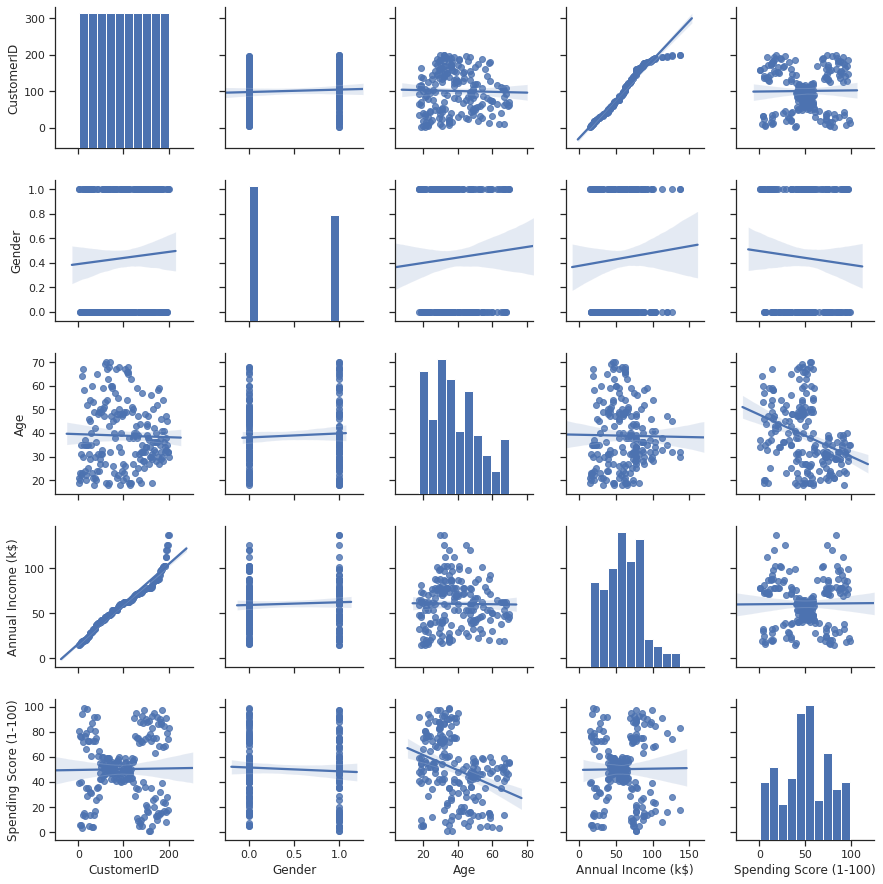

In [209]:
sns.pairplot(data, kind = 'reg')

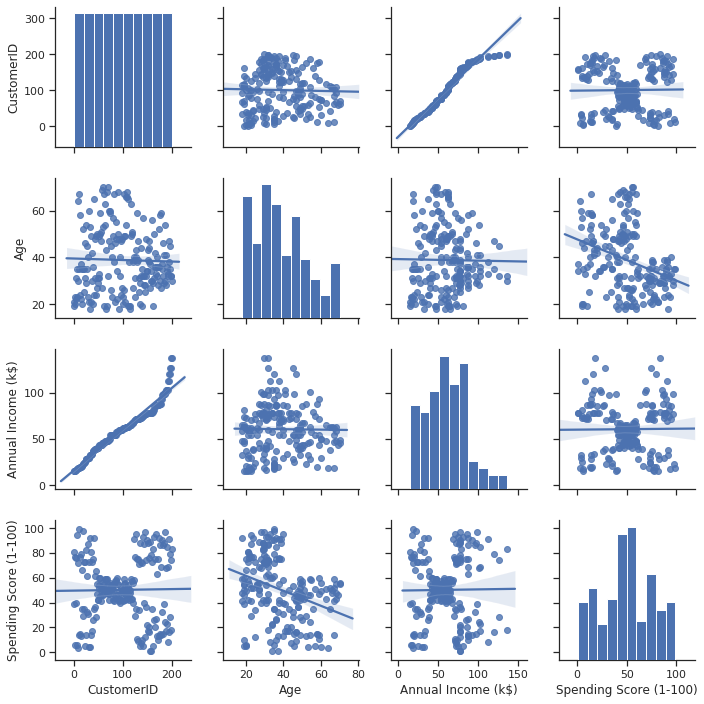

In [210]:
sns.pairplot(data.drop('Gender', axis=1), kind = 'reg')

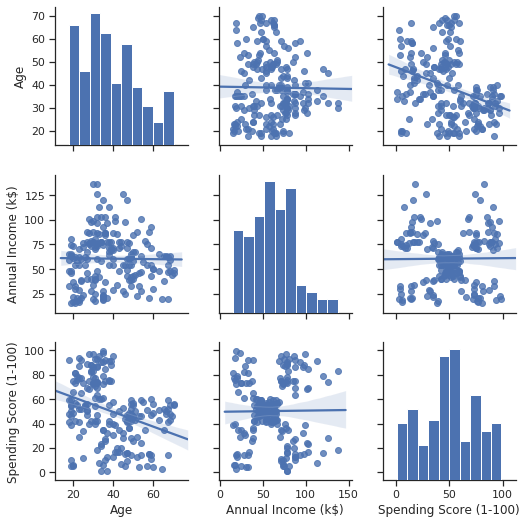

In [211]:
sns.pairplot(data.drop(['CustomerID', 'Gender'], axis=1), kind = 'reg')

From the above plot we can see that CustomerID and Gender has no direct relation to segmenting customers. That's why we can drop those and move on with other features.

In [212]:
# droping CustomerID and Gender feature
data.drop(['CustomerID', 'Gender'], axis=1, inplace = True)
data.columns = ['age', 'income', 'spend']
data.head()

,age,income,spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Building Model

In [213]:
from sklearn.cluster import KMeans

### Find out best cluster number by elbow method

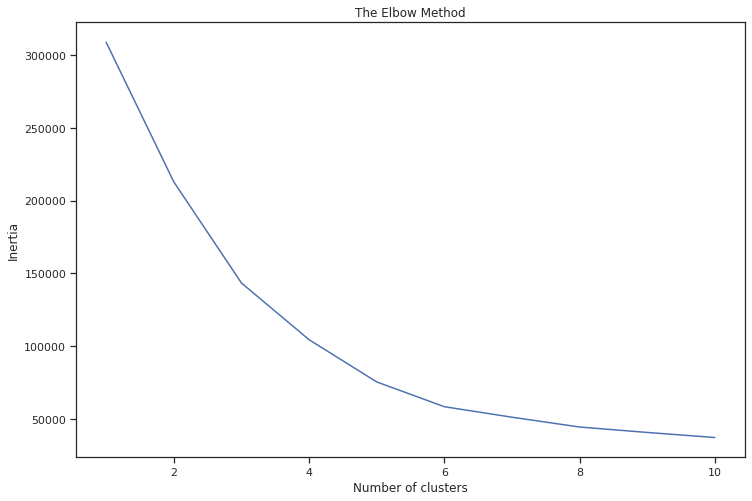

In [214]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters = n, random_state= 1)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    
#Visualizing the ELBOW method to get the optimal value of n_clusters
plt.figure(figsize = (12, 8))
plt.plot(range(1,11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

__We will consider the last elbow occurring point. From the figure, we can see that last elbow occurs at 6.__

In [215]:
kmeans = KMeans(n_clusters = 6, random_state = 1)
kmeans.fit(data)

KMeans(n_clusters=6, random_state=1)

## Prediction of the Model

In [216]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(labels.shape)
print(centroids.shape)

(200,)
(6, 3)


In [217]:
print(labels)

[4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
 5 4 5 3 5 3 0 4 5 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


### Visualizing the Clusters 

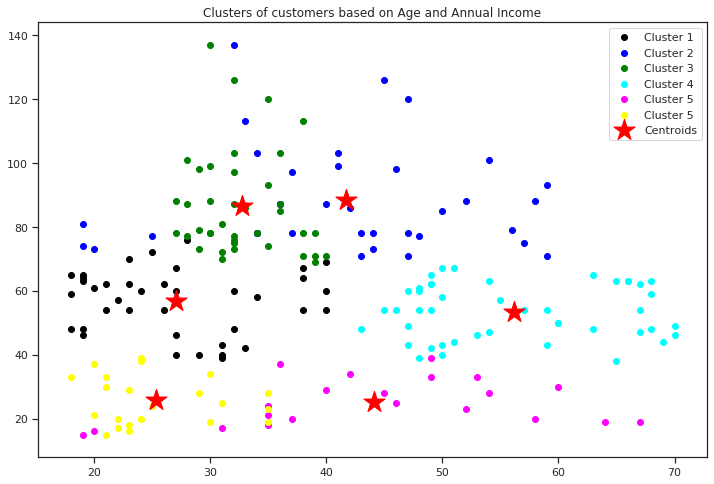

In [218]:
# cluster : based on Age and Annual Income

plt.figure(figsize = (12, 8))
plt.scatter(data[labels == 0].age, data[labels == 0].income, c = 'black', label = 'Cluster 1')
plt.scatter(data[labels == 1].age, data[labels == 1].income, c = 'blue', label = 'Cluster 2')
plt.scatter(data[labels == 2].age, data[labels == 2].income, c = 'green', label = 'Cluster 3')
plt.scatter(data[labels == 3].age, data[labels == 3].income, c = 'cyan', label = 'Cluster 4')
plt.scatter(data[labels == 4].age, data[labels == 4].income, c = 'magenta', label = 'Cluster 5')
plt.scatter(data[labels == 5].age, data[labels == 5].income, c = 'yellow', label = 'Cluster 5')

plt.scatter(centroids[:, 0], centroids[:, 1], s = 500, c = 'red', marker = '*', label = 'Centroids')

plt.title('Clusters of customers based on Age and Annual Income')
plt.legend()
plt.show()

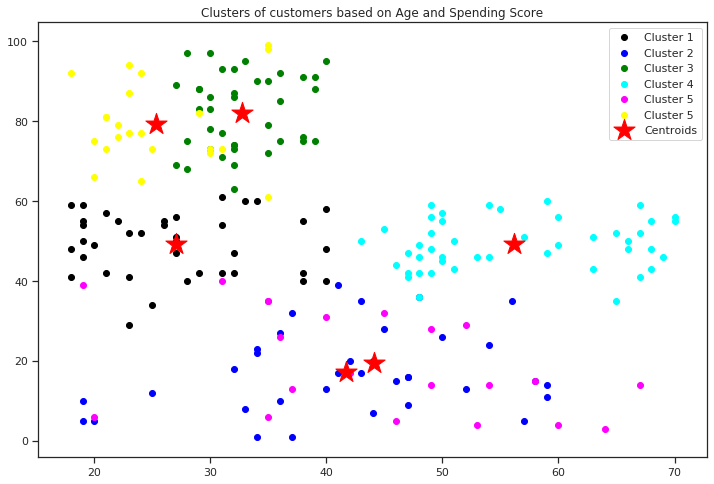

In [219]:
# cluster : based on Age and Spending Score

plt.figure(figsize = (12, 8))
plt.scatter(data[labels == 0].age, data[labels == 0].spend, c = 'black', label = 'Cluster 1')
plt.scatter(data[labels == 1].age, data[labels == 1].spend, c = 'blue', label = 'Cluster 2')
plt.scatter(data[labels == 2].age, data[labels == 2].spend, c = 'green', label = 'Cluster 3')
plt.scatter(data[labels == 3].age, data[labels == 3].spend, c = 'cyan', label = 'Cluster 4')
plt.scatter(data[labels == 4].age, data[labels == 4].spend, c = 'magenta', label = 'Cluster 5')
plt.scatter(data[labels == 5].age, data[labels == 5].spend, c = 'yellow', label = 'Cluster 5')

plt.scatter(centroids[:, 0], centroids[:, 2], s = 500, c = 'red', marker = '*', label = 'Centroids')

plt.title('Clusters of customers based on Age and Spending Score')
plt.legend()
plt.show()

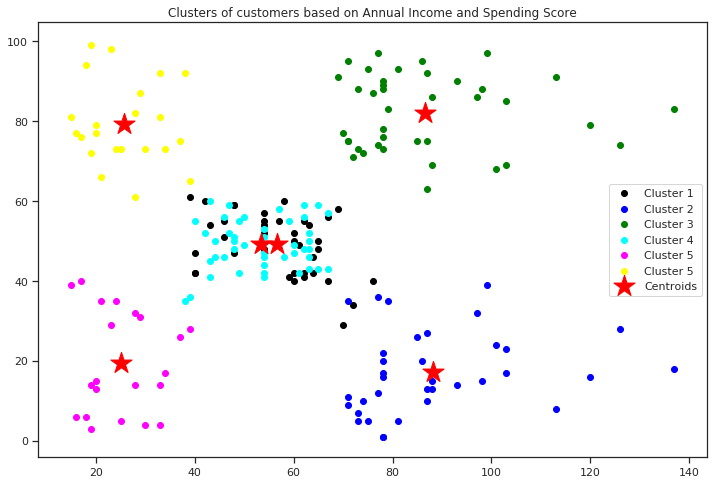

In [220]:
# cluster : based on Annual Income and Spending Score

plt.figure(figsize = (12, 8))
plt.scatter(data[labels == 0].income, data[labels == 0].spend, c = 'black', label = 'Cluster 1')
plt.scatter(data[labels == 1].income, data[labels == 1].spend, c = 'blue', label = 'Cluster 2')
plt.scatter(data[labels == 2].income, data[labels == 2].spend, c = 'green', label = 'Cluster 3')
plt.scatter(data[labels == 3].income, data[labels == 3].spend, c = 'cyan', label = 'Cluster 4')
plt.scatter(data[labels == 4].income, data[labels == 4].spend, c = 'magenta', label = 'Cluster 5')
plt.scatter(data[labels == 5].income, data[labels == 5].spend, c = 'yellow', label = 'Cluster 5')

plt.scatter(centroids[:, 1], centroids[:, 2], s = 500, c = 'red', marker = '*', label = 'Centroids')

plt.title('Clusters of customers based on Annual Income and Spending Score')
plt.legend()
plt.show()

## Evaluation of the Model

In [221]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [222]:
silhouette_samples(data, labels)

array([ 0.13619179,  0.68441587,  0.42768793,  0.6889679 ,  0.27101215,
        0.68642763,  0.56794918,  0.65098084,  0.47615201,  0.63439606,
        0.4272782 ,  0.59126446,  0.52452601,  0.70867853,  0.5933044 ,
        0.71143747,  0.38901824,  0.5335457 ,  0.4163003 ,  0.59450944,
        0.35839228,  0.66526811,  0.5796938 ,  0.62672841,  0.53518961,
        0.67886245,  0.36280662,  0.2766345 ,  0.39814677,  0.67444998,
        0.47236305,  0.59428507,  0.4988822 ,  0.59244229,  0.51662947,
        0.6240216 ,  0.50389332,  0.50280585,  0.29730514,  0.47609331,
        0.22336129,  0.54451164,  0.11021749,  0.03642984,  0.14181299,
        0.11625919,  0.36433808,  0.38197194,  0.32077422,  0.27644257,
        0.37669816,  0.20327518,  0.34660895,  0.48672601,  0.41341893,
        0.30278711,  0.45521551,  0.54202416,  0.47491865,  0.50912136,
        0.55340952,  0.43552345,  0.59108657,  0.46818725,  0.60750415,
        0.38866277,  0.16551182,  0.59281577,  0.39795889,  0.37

In [223]:
# silhouette_score : best value is 1 and worst value is -1

silhouette_score(data, labels)

0.4523443947724053

In [224]:
#help('sklearn.metrics.silhouette_samples')

In [225]:
#help('sklearn.metrics.silhouette_score')